# Current

In [2]:
import requests
response = requests.get('http://www.airnowapi.org/aq/forecast/zipCode/?format=application/json&zipCode=11211&date=2018-07-20&distance=5&API_KEY=6DA9B461-48E2-4723-90B8-D62E5E7F2EE6')
data = response.json()
print(data)

[{'DateIssue': '2018-07-19 ', 'DateForecast': '2018-07-20 ', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.81, 'Longitude': -73.89, 'ParameterName': 'O3', 'AQI': 71, 'Category': {'Number': 2, 'Name': 'Moderate'}, 'ActionDay': False, 'Discussion': ''}, {'DateIssue': '2018-07-19 ', 'DateForecast': '2018-07-20 ', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.81, 'Longitude': -73.89, 'ParameterName': 'PM2.5', 'AQI': 49, 'Category': {'Number': 1, 'Name': 'Good'}, 'ActionDay': False, 'Discussion': ''}]


# Specific date

In [5]:
import requests
response = requests.get('http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode=11211&date=2018-07-01T00-0000&distance=25&API_KEY=6DA9B461-48E2-4723-90B8-D62E5E7F2EE6')
data = response.json()
print(data)

[{'DateObserved': '2018-07-01 ', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.81, 'Longitude': -73.89, 'ParameterName': 'OZONE', 'AQI': 140, 'Category': {'Number': 3, 'Name': 'Unhealthy for Sensitive Groups'}}, {'DateObserved': '2018-07-01 ', 'HourObserved': 0, 'LocalTimeZone': 'EST', 'ReportingArea': 'New York City Region', 'StateCode': 'NY', 'Latitude': 40.81, 'Longitude': -73.89, 'ParameterName': 'PM2.5', 'AQI': 74, 'Category': {'Number': 2, 'Name': 'Moderate'}}]


In [11]:
for row in data:
    print(row['ParameterName'], row['AQI'], row['Category']['Name'])

OZONE 140 Unhealthy for Sensitive Groups
PM2.5 74 Moderate


In [12]:
dt = []

for row in data:
    
    newdict = {}
    
    newdict['parameter'] = row['ParameterName']
    newdict['aqi'] = row['AQI']
    newdict['category'] = row['Category']['Name']
    
    dt.append(newdict)
    
print(dt)

[{'parameter': 'OZONE', 'aqi': 140, 'category': 'Unhealthy for Sensitive Groups'}, {'parameter': 'PM2.5', 'aqi': 74, 'category': 'Moderate'}]


In [21]:
import pandas as pd

df = pd.DataFrame(dt)

df

,aqi,category,parameter
0,140,Unhealthy for Sensitive Groups,OZONE
1,74,Moderate,PM2.5


In [19]:
df.dtypes

aqi           int64
category     object
parameter    object
dtype: object

In [51]:
df.aqi

0    140.0
1     74.0
Name: aqi, dtype: float64

In [52]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [53]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.titlesize': 'x-large',
    'axes.grid': True,
    'grid.color': '#131313',
    'axes.axisbelow': True,
    'font.serif': 'Arial',
    'figure.facecolor': '#F6F6EE',
    'figure.titleweight' : 'bold',
    'figure.titlesize' : 'large',
    'axes.grid': False,
    'patch.edgecolor': '#131313',
    'text.color': '#131313',
    'axes.facecolor': '#F6F6EE',
    'axes.prop_cycle': cycler('color', ['#384A77', '#D0112B', '#FDCF44', '#131313', '#ffffff', '#156261', '#D6D6D6']),
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'xtick.top' : False,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 50.0,
    'legend.frameon' : False,
    'legend.loc' : 'best',
    'legend.columnspacing' : 0.0,
    'ytick.major.pad' : 2.5
})

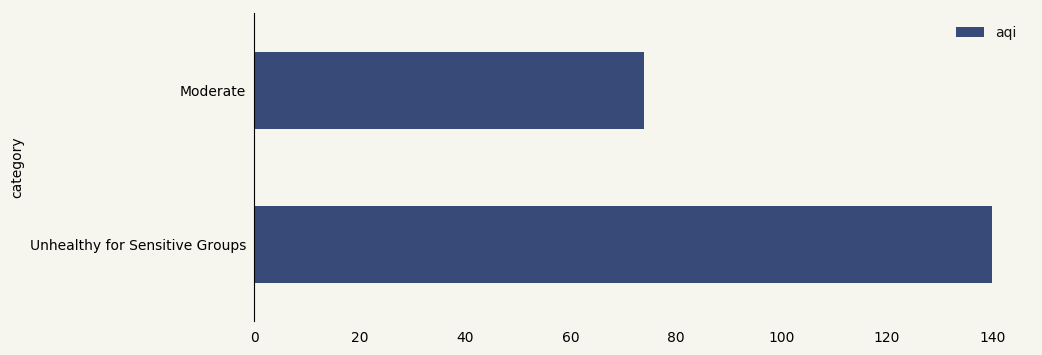

In [54]:
df.plot(x='category', kind='barh', figsize=(10,4))
plt.show()